In [1]:
import numpy as np 
import pandas as pd    
import matplotlib.pyplot as plt
import mne
import seaborn as sns

In [7]:
raw = mne.io.read_raw_edf('D:\CHB_MIT\chb01_03.edf', preload=True)
raw

Extracting EDF parameters from D:\CHB_MIT\chb01_03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\ACER\AppData\Local\Temp\ipykernel_1224\2637501130.py:1: SyntaxWarning: invalid escape sequence '\C'
  raw = mne.io.read_raw_edf('D:\CHB_MIT\chb01_03.edf', preload=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_1224\2637501130.py:1: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf('D:\CHB_MIT\chb01_03.edf', preload=True)


Measurement date,"November 06, 2076 13:43:04 GMT"
Experimenter,Unknown
Participant,Surrogate
Digitized points,Not available
Good channels,23 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,256.00 Hz
Highpass,0.00 Hz
Lowpass,128.00 Hz


In [8]:
raw.info

Measurement date,"November 06, 2076 13:43:04 GMT"
Experimenter,Unknown
Participant,Surrogate
Digitized points,Not available
Good channels,23 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,256.00 Hz
Highpass,0.00 Hz
Lowpass,128.00 Hz


In [9]:
# List of channels with some inconsistencies
channels = [
    'FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1',
    'FP1-F3', 'F3-C3', 'C3-P3', 'P3-O1',
    'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2',
    'FP2-F8', 'F8-T8', 'T8-P8-0', 'P8-O2',
    'FZ-CZ', 'CZ-PZ', 'T7-FT9',
    'FT9-FT10', 'FT10-T8',
]


# Select only the unique, standardized channels
raw.pick_channels(channels)
# Rename 'T8-P8-0' to 'T8-P8'
channel_mapping = {'T8-P8-0': 'T8-P8'}
mne.rename_channels(raw.info, channel_mapping)

# Apply a bandpass filter (0.5 to 70 Hz)
raw.filter(l_freq=0.5, h_freq=100.0)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Measurement date,"November 06, 2076 13:43:04 GMT"
Experimenter,Unknown
Participant,Surrogate
Digitized points,Not available
Good channels,21 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,256.00 Hz
Highpass,0.50 Hz
Lowpass,100.00 Hz


In [14]:
raw.info['projs']

[]

In [5]:
raw.plot()

Using qt as 2D backend.


Channels marked as bad:
none


In [6]:
seizure_start_time = 2996  # in seconds
seizure_end_time = 3036  # in seconds


# Convert seizure times to onset and duration (in seconds)
onset = seizure_start_time  # onset time in seconds
duration = seizure_end_time - seizure_start_time  # duration in seconds

In [8]:
# Create an annotation object
annotations = mne.Annotations(onset=[onset], duration=[duration], description=['seizure'])

# Set the annotations to the raw data
raw.set_annotations(annotations)
raw.plot()

In [9]:
raw.filter(0.5, 100)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Measurement date,"November 06, 2076 13:43:04 GMT"
Experimenter,Unknown
Participant,Surrogate
Digitized points,Not available
Good channels,21 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,256.00 Hz
Highpass,0.50 Hz
Lowpass,100.00 Hz


In [21]:
# Applying a notch filter at 60 Hz
raw.notch_filter(freqs=60, method = 'fir', fir_design='firwin')

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Measurement date,"November 06, 2076 13:43:04 GMT"
Experimenter,Unknown
Participant,Surrogate
Digitized points,Not available
Good channels,23 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,256.00 Hz
Highpass,0.00 Hz
Lowpass,128.00 Hz


In [22]:
def add_arrows(axes):
    """Add some arrows at 60 Hz and its harmonics."""
    for ax in axes:
        freqs = ax.lines[-1].get_xdata()
        psds = ax.lines[-1].get_ydata()
        for freq in (60, 128):
            idx = np.searchsorted(freqs, freq)
            # get ymax of a small region around the freq. of interest
            y = psds[(idx - 4) : (idx + 5)].max()
            ax.arrow(
                x=freqs[idx],
                y=y + 18,
                dx=0,
                dy=-12,
                color="red",
                width=0.1,
                head_width=3,
                length_includes_head=True,
            )

fig = raw.compute_psd(fmax=128).plot(
    average=True, amplitude=False, picks="data", exclude="bads"
)
add_arrows(fig.axes[:2])

Effective window size : 8.000 (s)
Plotting power spectral density (dB=True).


C:\Users\ACER\mne-python\1.7.1_0\Lib\site-packages\mne\viz\utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


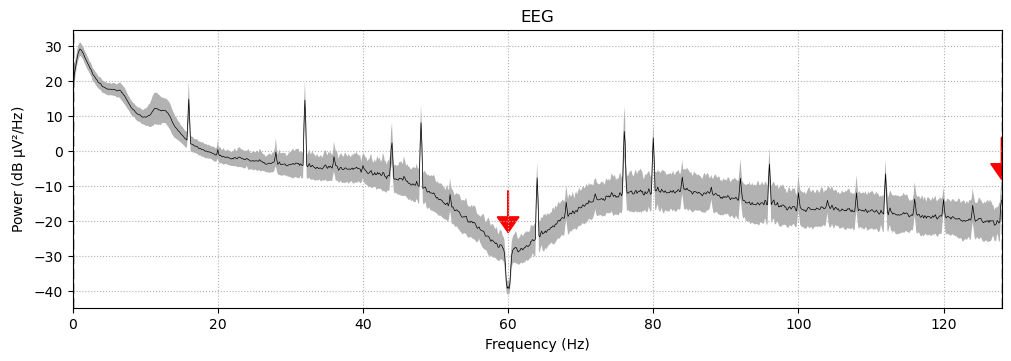

In [23]:
fig

In [24]:
raw_notch_fit = raw.copy().notch_filter(
    freqs=256, picks='all', method="spectrum_fit", filter_length="10s"
)
for title, data in zip(["Un", "spectrum_fit "], [raw, raw_notch_fit]):
    fig = data.compute_psd(fmax=128).plot(
        average=True, amplitude=False, picks="data", exclude="bads"
    )
    fig.suptitle(f"{title}filtered", size="xx-large", weight="bold")
    add_arrows(fig.axes[:2])

Filtering raw data in 1 contiguous segment
Removed notch frequencies (Hz):
    128.00 : 16537 windows
Effective window size : 8.000 (s)
Plotting power spectral density (dB=True).
Effective window size : 8.000 (s)


C:\Users\ACER\mne-python\1.7.1_0\Lib\site-packages\mne\viz\utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


Plotting power spectral density (dB=True).


C:\Users\ACER\mne-python\1.7.1_0\Lib\site-packages\mne\viz\utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


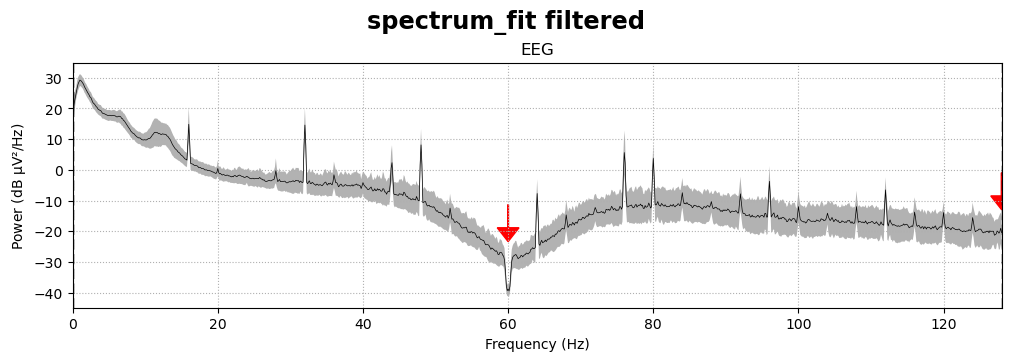

In [25]:
fig

In [26]:
raw.resample(256, npad="auto")

Sampling frequency of the instance is already 256.0, returning unmodified.


Measurement date,"November 06, 2076 13:43:04 GMT"
Experimenter,Unknown
Participant,Surrogate
Digitized points,Not available
Good channels,23 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,256.00 Hz
Highpass,0.00 Hz
Lowpass,128.00 Hz


In [27]:
raw.set_eeg_reference('average', projection=True)


EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.


Measurement date,"November 06, 2076 13:43:04 GMT"
Experimenter,Unknown
Participant,Surrogate
Digitized points,Not available
Good channels,23 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,256.00 Hz
Highpass,0.00 Hz
Lowpass,128.00 Hz


In [30]:
# Apply the projection
raw.apply_proj()

Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...


Measurement date,"November 06, 2076 13:43:04 GMT"
Experimenter,Unknown
Participant,Surrogate
Digitized points,Not available
Good channels,23 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,256.00 Hz
Highpass,0.00 Hz
Lowpass,128.00 Hz


In [29]:
raw.info['projs']

[<Projection | Average EEG reference, active : False, n_channels : 23>]

In [31]:
raw.plot()

Channels marked as bad:
none


In [23]:
%%capture
!pip install pyedflib
!pip install PyWavelets

In [24]:
# Ensure all necessary libraries are installed
!pip install pyedflib numpy pandas matplotlib pillow scikit-learn PyWavelets

In [25]:
import pyedflib
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D   
from PIL import Image
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.tree import DecisionTreeClassifier as DecisionTree
from sklearn.ensemble import RandomForestClassifier as RandomForest
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn import linear_model
import pywt
import matplotlib.patches as patches
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier as KNN



In [27]:
# Load the edf file
f = pyedflib.EdfReader("D:\CHB_MIT\chb01_03.edf")
n = f.signals_in_file
signal_labels = f.getSignalLabels()
sigbufs = np.zeros((n, f.getNSamples()[0]))
for i in np.arange(n):
    sigbufs[i, :] = f.readSignal(i)

# and load the data into a DataFrame
df_signals = pd.DataFrame(sigbufs)
df_signals = df_signals.transpose()
df_signals.columns = signal_labels

In [28]:
signal_labels

['FP1-F7',
 'F7-T7',
 'T7-P7',
 'P7-O1',
 'FP1-F3',
 'F3-C3',
 'C3-P3',
 'P3-O1',
 'FP2-F4',
 'F4-C4',
 'C4-P4',
 'P4-O2',
 'FP2-F8',
 'F8-T8',
 'T8-P8',
 'P8-O2',
 'FZ-CZ',
 'CZ-PZ',
 'P7-T7',
 'T7-FT9',
 'FT9-FT10',
 'FT10-T8',
 'T8-P8']

In [29]:
df_signals

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,F8-T8,T8-P8,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8
0,-17.777778,39.267399,-3.711844,8.400488,-0.586081,4.102564,37.704518,-15.042735,-17.387057,-45.128205,...,-106.862027,-59.975580,180.317460,-18.559219,85.372405,4.102564,20.903541,-9.181929,-39.658120,-59.975580
1,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,...,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360
2,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,...,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360
3,0.586081,0.195360,0.195360,0.195360,0.195360,0.195360,0.586081,-0.195360,0.195360,0.586081,...,-0.976801,0.195360,2.148962,0.586081,0.586081,0.195360,1.367521,-0.195360,-0.195360,0.195360
4,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,...,0.195360,0.195360,2.148962,0.195360,0.195360,0.195360,-0.195360,0.195360,0.195360,0.195360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921595,-33.797314,-39.658120,63.492063,23.638584,15.042735,-27.545788,20.122100,5.274725,16.605617,-2.148962,...,78.339438,-1.367521,-51.379731,13.479853,-31.062271,-63.101343,-5.665446,88.107448,47.863248,-1.367521
921596,-27.545788,-26.764347,65.054945,10.354090,22.857143,-11.916972,18.559219,-9.181929,26.373626,4.884005,...,89.670330,9.963370,-69.352869,26.373626,-26.764347,-64.664225,-4.884005,79.120879,48.644689,9.963370
921597,-17.777778,-23.247863,59.194139,14.652015,34.188034,-2.539683,9.181929,-9.181929,30.671551,4.493284,...,77.167277,19.340659,-45.128205,22.466422,-25.982906,-58.803419,8.009768,48.644689,43.565324,19.340659
921598,-8.791209,-22.466422,60.366300,11.916972,42.393162,2.930403,14.652015,-19.731380,35.750916,8.400488,...,63.101343,26.373626,-27.936508,24.420024,-18.559219,-59.975580,25.982906,27.936508,38.485958,26.373626


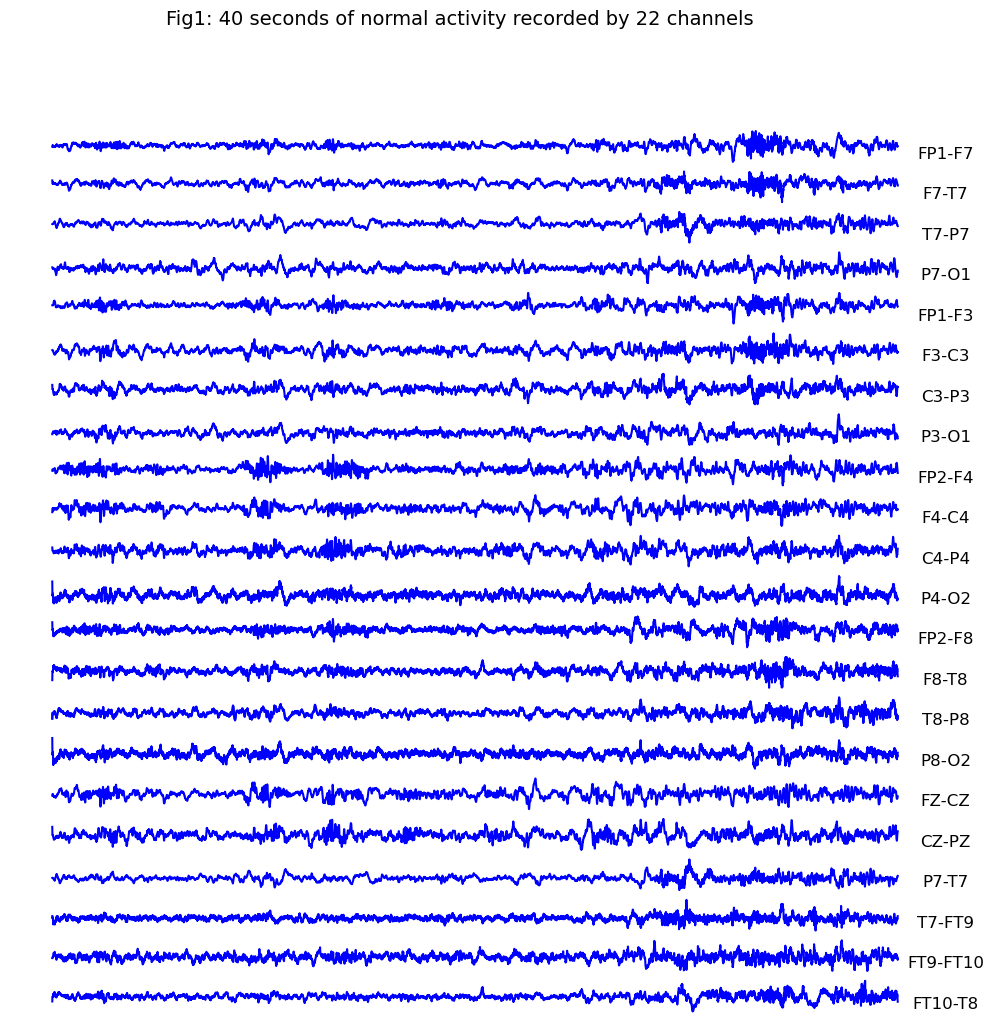

In [43]:
ax = ['ax'+str(i) for i in range(23)]
C = df_signals.columns
plt.figure(figsize=(12,12))
plt.suptitle("Fig1: 40 seconds of normal activity recorded by 22 channels", fontsize= 14)
for i in range(22): 
    ax[i] = plt.subplot(23,1,i+1)
    ax[i].plot(df_signals[C[i]].iloc[0:10240],"blue")
    ax[i].set_xticklabels([])
    ax[i].set_yticklabels([])
    ax[i].tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off' ,length=0) 
    ax[i].spines["top"].set_visible(False)
    ax[i].spines["bottom"].set_visible(False)
    ax[i].spines["right"].set_visible(False)
    ax[i].spines["left"].set_visible(False)
    ax[i].set_ylabel(C[i], fontsize=12, rotation=0)
    ax[i].yaxis.set_label_position("right")

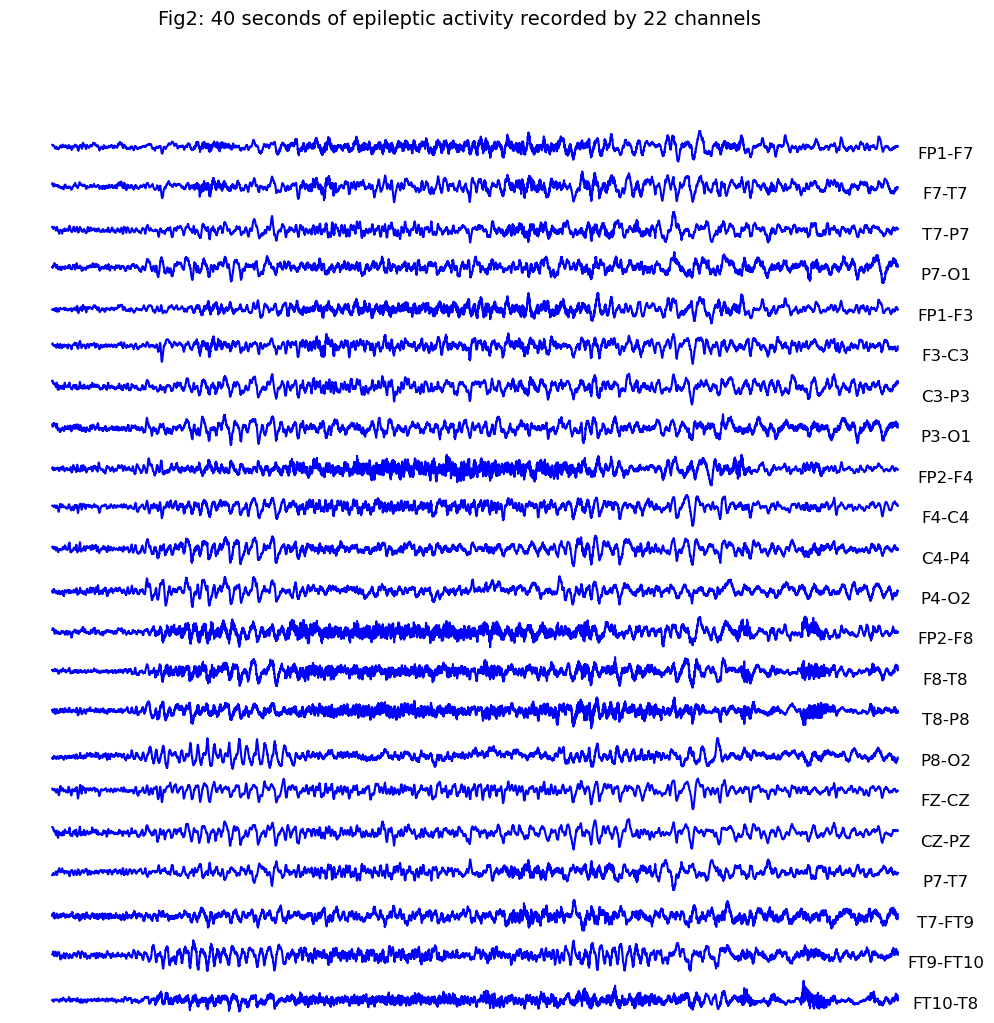

In [44]:
ax = ['ax'+str(i) for i in range(23)]
C = df_signals.columns

plt.figure(figsize=(12,12))
plt.suptitle("Fig2: 40 seconds of epileptic activity recorded by 22 channels", fontsize= 14)
for i in range(22): 
    ax[i] = plt.subplot(23,1,i+1)
    ax[i].plot(df_signals[C[i]].iloc[766976:(777216)],"blue")
    ax[i].set_xticklabels([])
    ax[i].set_yticklabels([])
    ax[i].tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off' ,length=0) 
    ax[i].spines["top"].set_visible(False)
    ax[i].spines["bottom"].set_visible(False)
    ax[i].spines["right"].set_visible(False)
    ax[i].spines["left"].set_visible(False)
    ax[i].set_ylabel(C[i], fontsize=12, rotation=0)
    ax[i].yaxis.set_label_position("right")